In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import os
import datetime
import requests
from bs4 import BeautifulSoup
import requests
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf
import sklearn
import openpyxl
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [4]:
df = pd.read_excel('AAPL.xlsx')

In [5]:
empty_rows = df.isnull().all(axis=1)
non_empty_rows = ~empty_rows
df = df.loc[non_empty_rows].reset_index(drop=True)

In [6]:
df.rename(columns={'text__text__1FZLe':'Category','text__text__1FZLe 2':'Title','text__text__1FZLe href':'Link','text__text__1FZLe 3':'Date' },inplace=True)

In [7]:
df = df[['Category','Title','Link','Date']]

In [8]:
df

,Category,Title,Link,Date
0,Business,"US STOCKS Wall Street ends sharply lower, tech...",https://www.reuters.com/business/us-stocks-wal...,"February 25, 2021"
1,Business,"US STOCKS Nasdaq finishes higher, tech stocks ...",https://www.reuters.com/business/us-stocks-nas...,"February 26, 2021"
2,World,"TSMC sees chip shortage lasting into 2022, boo...",https://www.reuters.com/world/china/tsmcs-q1-p...,"April 15, 2021"
3,Business,Dell GC comp hits $8.5 mln as tech giant grapp...,https://www.reuters.com/business/legal/dell-gc...,"May 14, 2021"
4,Business,Hong Kong freezes listed shares of media tycoo...,https://www.reuters.com/business/finance/hong-...,"May 14, 2021"
...,...,...,...,...
935,Technology,Apple scales back Vision Pro production plans ...,https://www.reuters.com/markets/us/wall-st-wee...,"July 3, 2023"
936,Technology,Analysis: Apple's growing stock market heft po...,https://www.reuters.com/markets/us/wall-st-wee...,"July 3, 2023"
937,Legal,Apple to ask US Supreme Court to undo App Stor...,https://www.reuters.com/markets/us/wall-st-wee...,"July 3, 2023"
938,Technology,U.S. Big Tech says it meets EU gatekeeper stat...,https://www.reuters.com/markets/us/wall-st-wee...,"July 4, 2023"


In [9]:
print(f'For tech: {len(df[df["Category"]=="Technology"])} articles')
print(f'For Markets: {len(df[df["Category"]=="Markets"])} articles')
print(f'For Macro Matters: {len(df[df["Category"]=="Macro Matters"])} articles')
print(f'For Business: {len(df[df["Category"]=="Business"])} articles')
print(f'For World: {len(df[df["Category"]=="World"])} articles')
print(f'For Breakingviews: {len(df[df["Category"]=="Breakingviews"])} articles')

For tech: 128 articles
For Markets: 379 articles
For Macro Matters: 10 articles
For Business: 261 articles
For World: 44 articles
For Breakingviews: 50 articles


In [10]:
df['Category'].unique()

array(['Business', 'World', 'Technology', 'Breakingviews', 'China',
       'Finance', 'Take Five', 'Legal', 'Lifestyle', 'Future of Money',
       'Disrupted', 'Autos & Transportation', 'Media & Telecom',
       'United States', 'Markets', 'U.S. Markets', 'Macro Matters',
       'European Markets', 'Retail & Consumer', 'The Great Reboot',
       'Charged', 'FOCUS', 'EXPLAINER', 'Podcasts', 'World at Work',
       'Wealth'], dtype=object)

In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

sentiments = []
for title in df['Title']:
    sentiment = sia.polarity_scores(title)['compound']
    sentiments.append(sentiment)

df['sentiment'] = sentiments

In [12]:
df

,Category,Title,Link,Date,sentiment
0,Business,"US STOCKS Wall Street ends sharply lower, tech...",https://www.reuters.com/business/us-stocks-wal...,"February 25, 2021",-0.2960
1,Business,"US STOCKS Nasdaq finishes higher, tech stocks ...",https://www.reuters.com/business/us-stocks-nas...,"February 26, 2021",-0.4019
2,World,"TSMC sees chip shortage lasting into 2022, boo...",https://www.reuters.com/world/china/tsmcs-q1-p...,"April 15, 2021",0.3612
3,Business,Dell GC comp hits $8.5 mln as tech giant grapp...,https://www.reuters.com/business/legal/dell-gc...,"May 14, 2021",-0.2500
4,Business,Hong Kong freezes listed shares of media tycoo...,https://www.reuters.com/business/finance/hong-...,"May 14, 2021",0.5423
...,...,...,...,...,...
935,Technology,Apple scales back Vision Pro production plans ...,https://www.reuters.com/markets/us/wall-st-wee...,"July 3, 2023",0.3182
936,Technology,Analysis: Apple's growing stock market heft po...,https://www.reuters.com/markets/us/wall-st-wee...,"July 3, 2023",0.0000
937,Legal,Apple to ask US Supreme Court to undo App Stor...,https://www.reuters.com/markets/us/wall-st-wee...,"July 3, 2023",0.5574
938,Technology,U.S. Big Tech says it meets EU gatekeeper stat...,https://www.reuters.com/markets/us/wall-st-wee...,"July 4, 2023",-0.3182


In [13]:
df.to_excel('sentiment_news.xlsx')

In [14]:
# For Overall Sentiment
overAll = df
# For tech sentiment
tech = df[df['Category']=='Technology'].reset_index(drop=True)
# For market and business
mask = (df['Category'] == 'Business') | (df['Category'] == 'Markets') | (df['Category'] == 'European Markets')|(df['Category'] == 'Wealth')|(df['Category'] == 'Finance') 
stock = df[mask].reset_index(drop=True)

In [15]:
arr = []
words = ['apple','iphone','mac','tim','cook','ipad','vision pro','aapl','itunes','ios','macbook','imac']
for i in range(len(df)):
    val = 0
    for j in words:
        title = df.iloc[i]['Title'].lower()
        if any(keyword in title for keyword in words):
            val = 1
            break
    arr.append(val)
df['isApple'] =arr

In [16]:
df['isApple'].value_counts()

0    801
1    139
Name: isApple, dtype: int64

In [17]:
df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d')

In [18]:
df

,Category,Title,Link,Date,sentiment,isApple
0,Business,"US STOCKS Wall Street ends sharply lower, tech...",https://www.reuters.com/business/us-stocks-wal...,2021-02-25,-0.2960,0
1,Business,"US STOCKS Nasdaq finishes higher, tech stocks ...",https://www.reuters.com/business/us-stocks-nas...,2021-02-26,-0.4019,0
2,World,"TSMC sees chip shortage lasting into 2022, boo...",https://www.reuters.com/world/china/tsmcs-q1-p...,2021-04-15,0.3612,0
3,Business,Dell GC comp hits $8.5 mln as tech giant grapp...,https://www.reuters.com/business/legal/dell-gc...,2021-05-14,-0.2500,1
4,Business,Hong Kong freezes listed shares of media tycoo...,https://www.reuters.com/business/finance/hong-...,2021-05-14,0.5423,0
...,...,...,...,...,...,...
935,Technology,Apple scales back Vision Pro production plans ...,https://www.reuters.com/markets/us/wall-st-wee...,2023-07-03,0.3182,1
936,Technology,Analysis: Apple's growing stock market heft po...,https://www.reuters.com/markets/us/wall-st-wee...,2023-07-03,0.0000,1
937,Legal,Apple to ask US Supreme Court to undo App Stor...,https://www.reuters.com/markets/us/wall-st-wee...,2023-07-03,0.5574,1
938,Technology,U.S. Big Tech says it meets EU gatekeeper stat...,https://www.reuters.com/markets/us/wall-st-wee...,2023-07-04,-0.3182,0


In [19]:
from datetime import datetime, timedelta

last_year_date = (datetime.now() - timedelta(days=365)).strftime("%Y-%m-%d")

In [20]:
last_year_date

'2022-07-05'

In [21]:
apple = yf.Ticker('AAPL') 

In [22]:
import datetime

In [23]:
end_date = datetime.datetime.now().strftime('%Y-%m-%d')
start_date = (datetime.datetime.now() - datetime.timedelta(days=3*365)).strftime('%Y-%m-%d') 

In [24]:
apple = apple.history(start=start_date, end=end_date)

In [25]:
len(apple)

754

In [26]:
apple.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-07-06,90.816664,92.235368,90.784755,91.761650,118655600,0.0,0.0
2020-07-07,92.144539,92.932433,91.364008,91.476913,112424400,0.0,0.0
2020-07-08,92.466079,93.639332,92.377713,93.607422,117092000,0.0,0.0
2020-07-09,94.510662,94.564661,92.949601,94.009949,125642800,0.0,0.0
2020-07-10,93.600063,94.233329,92.981530,94.174416,90257200,0.0,0.0


In [27]:
apple.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-06-27,185.889999,188.389999,185.669998,188.059998,50730800,0.0,0.0
2023-06-28,187.929993,189.899994,187.600006,189.250000,51216800,0.0,0.0
2023-06-29,189.080002,190.070007,188.940002,189.589996,46347300,0.0,0.0
2023-06-30,191.630005,194.479996,191.259995,193.970001,85069600,0.0,0.0
2023-07-03,193.779999,193.880005,191.759995,192.460007,31458200,0.0,0.0


In [28]:
apple['Date'] = apple.index

In [29]:
apple.reset_index(drop=True,inplace=True)

In [30]:
start_date = str(apple.iloc[0]['Date'])[:10]

In [31]:
start_date

'2020-07-06'

In [32]:
score_start = int(start_date[:4])*365 + int(start_date[5:7])*30 + int(start_date[8:10])

In [33]:
arr = [0]*len(apple)
countArr = [1]*len(apple)

In [34]:
df

,Category,Title,Link,Date,sentiment,isApple
0,Business,"US STOCKS Wall Street ends sharply lower, tech...",https://www.reuters.com/business/us-stocks-wal...,2021-02-25,-0.2960,0
1,Business,"US STOCKS Nasdaq finishes higher, tech stocks ...",https://www.reuters.com/business/us-stocks-nas...,2021-02-26,-0.4019,0
2,World,"TSMC sees chip shortage lasting into 2022, boo...",https://www.reuters.com/world/china/tsmcs-q1-p...,2021-04-15,0.3612,0
3,Business,Dell GC comp hits $8.5 mln as tech giant grapp...,https://www.reuters.com/business/legal/dell-gc...,2021-05-14,-0.2500,1
4,Business,Hong Kong freezes listed shares of media tycoo...,https://www.reuters.com/business/finance/hong-...,2021-05-14,0.5423,0
...,...,...,...,...,...,...
935,Technology,Apple scales back Vision Pro production plans ...,https://www.reuters.com/markets/us/wall-st-wee...,2023-07-03,0.3182,1
936,Technology,Analysis: Apple's growing stock market heft po...,https://www.reuters.com/markets/us/wall-st-wee...,2023-07-03,0.0000,1
937,Legal,Apple to ask US Supreme Court to undo App Stor...,https://www.reuters.com/markets/us/wall-st-wee...,2023-07-03,0.5574,1
938,Technology,U.S. Big Tech says it meets EU gatekeeper stat...,https://www.reuters.com/markets/us/wall-st-wee...,2023-07-04,-0.3182,0


In [35]:
for i in range(len(df)):
    date = str(df.iloc[i]['Date'])
    date_score = int(date[:4])*365 + int(date[5:7])*30 + int(date[8:10])
    # Check for the case where date is 30 days prior to the 1st entry in the dates
    if score_start > date_score:
        print('Article too old')
        continue
    k  =0
    score_new = score_start
    while score_new < date_score and k < len(apple)-1:
         k+=1
         start_date = str(apple.iloc[k]['Date'])[:10]
         score_new = int(start_date[:4])*365 + int(start_date[5:7])*30 + int(start_date[8:10])
    
    param = 10
    sentiment = df.iloc[i]['sentiment']
    if k+12>len(apple):
        end = len(apple)
    else:
        end = k+12
        
    if df.iloc[i]['Category']=='Business' or df.iloc[i]['Category']=='Markets' or df.iloc[i]['Category']=='European Markets' or df.iloc[i]['Category']=='Wealth' or df.iloc[i]['Category']=='Finance' or df.iloc[i]['Category']=='Technology':
        val = 2
    else:
        val = 0.7
    
    if df.iloc[i]['isApple'] ==1:
        val*= 2
        
    for j in range(k,end):
        arr[j] += param*sentiment*val
        param /= 1.5
        

In [36]:
today_vals = arr[-8:]

In [41]:
arr = [0] + arr[:-1]

In [42]:
apple['Sentiment_score'] = arr

In [43]:
apple.to_excel('sentiment_new.xlsx')

In [44]:
apple = pd.read_excel('sentiment_new.xlsx')

In [45]:
# Getting the price difference
arr = []
for i in range(1,len(apple)):
    arr.append(((apple.iloc[i]['Close']-apple.iloc[i-1]['Close'])/apple.iloc[i]['Close'])*100)

In [46]:
apple = apple.tail(len(apple)-1)

In [47]:
apple['Diff'] = arr

In [48]:
apple.drop(columns={'Dividends','Stock Splits','Volume','High','Open','Low'},inplace=True)

In [49]:
arr = []
for i in range(7,len(apple)):
    arr.append(apple['Close'][i-7:i].tolist())

In [50]:
arr1 = []
for i in range(7,len(apple)):
    arr1.append(apple['Sentiment_score'][i-7:i].tolist())

In [51]:
arr2 = []
for i in range(7,len(apple)):
    arr2.append(apple['Diff'][i-7:i].tolist())

In [52]:
apple = apple.tail(len(apple)-7)

In [53]:
for i in range(0,7):
    day = f'D-{i+1}'
    news_s = f'N-{i+1}'
    diff_sc = f'Diff-{i+1}'
    arr_new = []
    for j in range(len(apple)):
        arr_new.append(arr[j][i])
    apple[day] = arr_new
    arr_new = []
    for j in range(len(apple)):
        arr_new.append(arr1[j][i])
    apple[news_s] = arr_new
    arr_new = []
    for j in range(len(apple)):
        arr_new.append(arr2[j][i])
    apple[diff_sc] = arr_new
        

In [54]:
apple.to_excel('file_new.xlsx')

In [55]:
import matplotlib.pyplot as plt

In [56]:
for i in range(len(apple)):
    if apple.iloc[i]['Sentiment_score']!=0:
        break

In [57]:
apple = apple.tail(len(apple)-i)

In [58]:
apple = apple.reset_index(drop=True)

In [59]:
apple.drop(columns={'Unnamed: 0'},inplace=True)

In [60]:
apple.to_excel('newApple.xlsx')

In [61]:
apple = apple.tail(529)

In [62]:
apple.to_excel('newApple1.xlsx')

In [63]:
apple = apple.reset_index(drop=True)

In [64]:
apple_diff_pred = apple[['Date','Sentiment_score','N-1','N-2','N-3','N-4','N-5','N-6','N-7','Diff-1','Diff-2','Diff-3','Diff-4','Diff-5','Diff-6','Diff-7','Diff']]

In [65]:
apple_score_pred = apple[['Date','Sentiment_score','N-1','N-2','N-3','N-4','N-5','N-6','N-7','D-1','D-2','D-3','D-4','D-5','D-6','D-7','Close']]

In [66]:
X = apple_score_pred.drop(columns={'Date','Close'}).values

In [67]:
y = apple_score_pred['Close'].values

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2,shuffle=False)

In [70]:
def analyze(model_name,model):
    ypred1 = model.predict(x_train)

    mse = mean_squared_error(y_train, ypred1)
    print("Mean Squared Error for train data:", mse)

    r2 = r2_score(y_train, ypred1)
    print("R-squared Score for train data:", r2)

    plt.figure(figsize=(12,8))
    plt.plot(apple['Date'].head(423),y_train)
    plt.plot(apple['Date'].head(423),ypred1)
    plt.title(f'Results on train data using {model_name}')
    plt.legend(['Actual Values','Predicted Values'])
    str1 = model_name + 'train.png'
    plt.savefig(str1)
    plt.show()

    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error for test data:", mse)

    r2 = r2_score(y_test, y_pred)
    print("R-squared Score for test data:", r2)

    plt.figure(figsize=(12,8))
    plt.plot(apple['Date'].tail(106),y_test)
    plt.plot(apple['Date'].tail(106),y_pred)
    plt.title(f'Results on test data using {model_name}')
    plt.legend(['Actual Values','Predicted Values'])
    str2 = model_name + 'test.png'
    plt.savefig(str2)
    plt.show()

## Trying out different models

#### We'll try the following models
- Linear Regressor
- Random Forest Classifier
- XGBoost regressor
- ridge regressor
- lasso regressor
- ElasticNet
- PassiveAggressiveRegressor

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import PassiveAggressiveRegressor

In [72]:
from sklearn.model_selection import GridSearchCV

In [74]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [85]:
len(today_vals)

8

In [100]:
x_final_test = []
x_final_test += today_vals
x_final_test +=  apple_score_pred['Close'].tolist()[-7:]

In [101]:
len(x_final_test)

15

In [102]:
x_final_test = np.array(x_final_test)

In [105]:
x_final_test = x_final_test.reshape(1, -1)

In [107]:
x = model.predict(x_final_test)

In [108]:
x[0]

191.8796789303194

### 1. Linear Regressor

Mean Squared Error for train data: 8.260588669263115
R-squared Score for train data: 0.9549073153532446


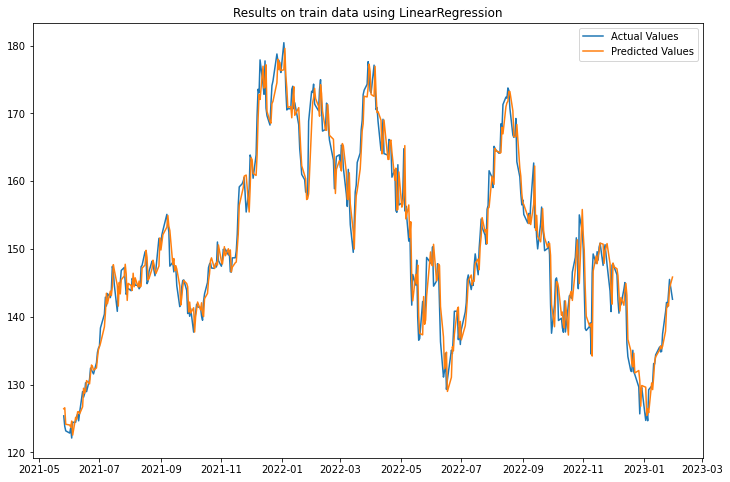

Mean Squared Error for test data: 5.116963526358984
R-squared Score for test data: 0.9696434451737692


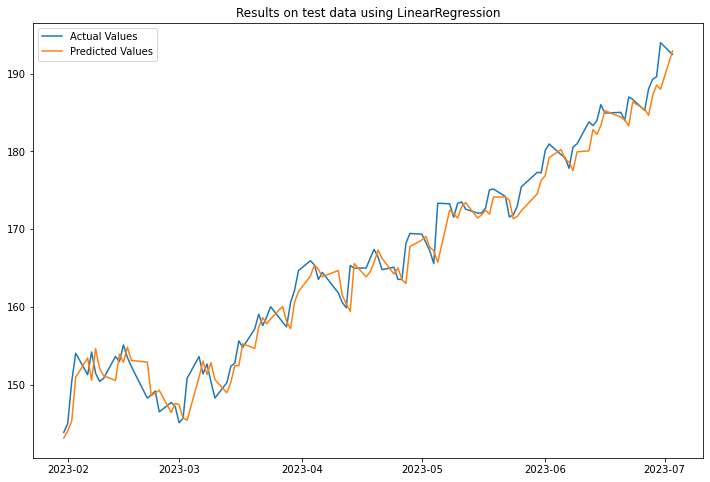

In [94]:
model = LinearRegression()
model.fit(x_train,y_train)
analyze('LinearRegression',model)

### 2. RandomForestRegressor 

Mean Squared Error for train data: 4.786727966393608
R-squared Score for train data: 0.97387033797048


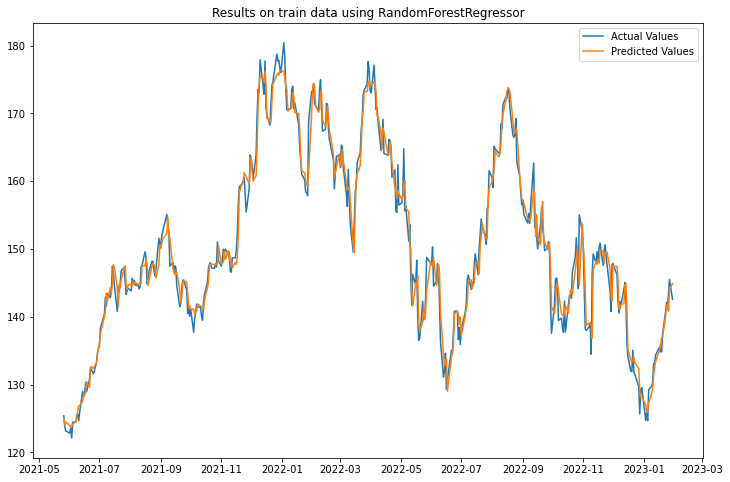

Mean Squared Error for test data: 27.837170616387994
R-squared Score for test data: 0.8348550675277495


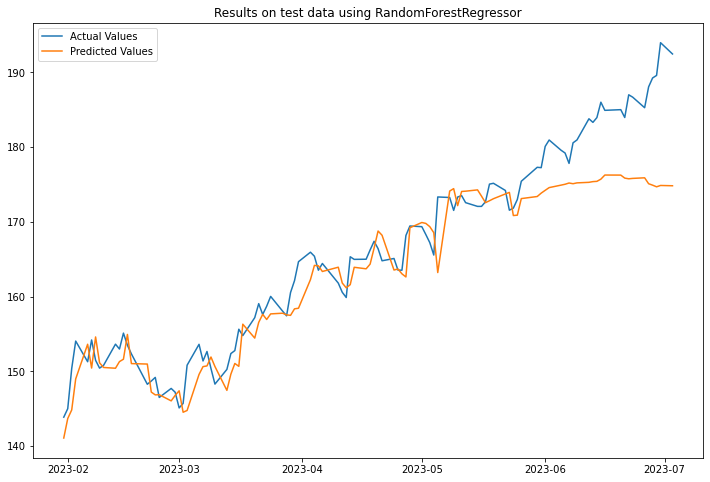

In [523]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)
model = grid_search.best_estimator_
analyze('RandomForestRegressor',model)

### 3. XGBoost regressor

Mean Squared Error for train data: 0.46063205677092167
R-squared Score for train data: 0.9974855138167762


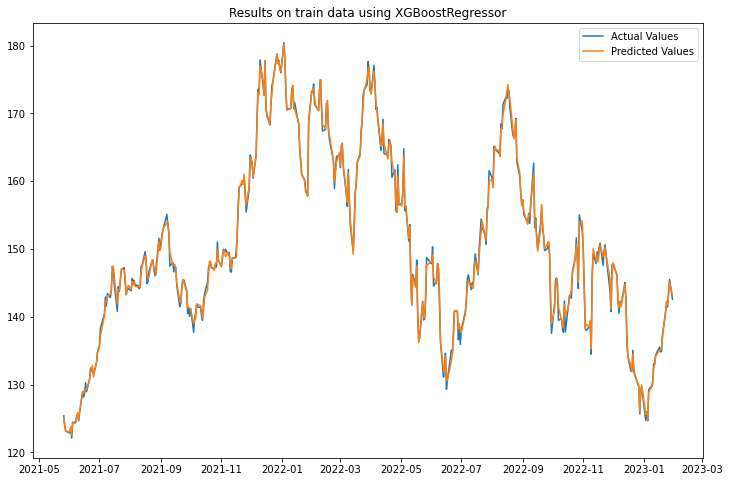

Mean Squared Error for test data: 35.569233063239395
R-squared Score for test data: 0.7889843521359787


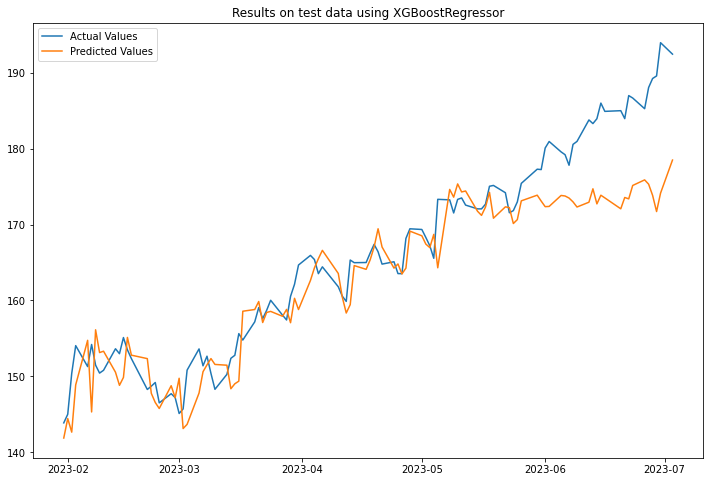

In [76]:
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [None,3]
}
rf = XGBRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)
model = grid_search.best_estimator_
analyze('XGBoostRegressor',model)

### 4. Ridge regressor

Mean Squared Error for train data: 8.260664337706046
R-squared Score for train data: 0.9549069022963341


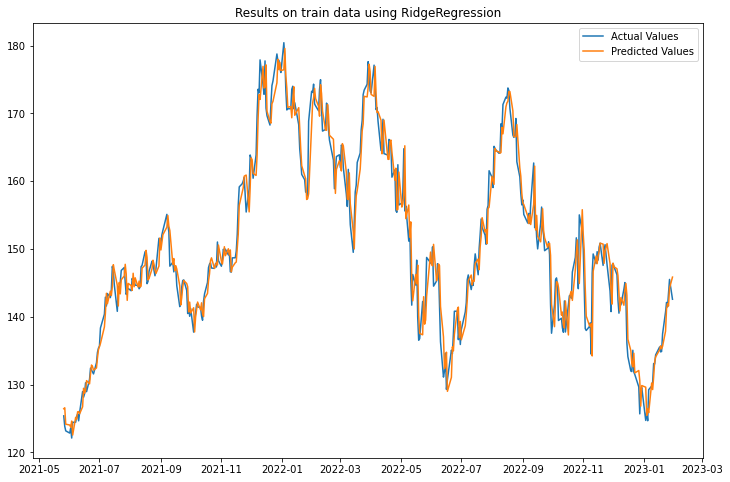

Mean Squared Error for test data: 5.1194680701224575
R-squared Score for test data: 0.9696285868853177


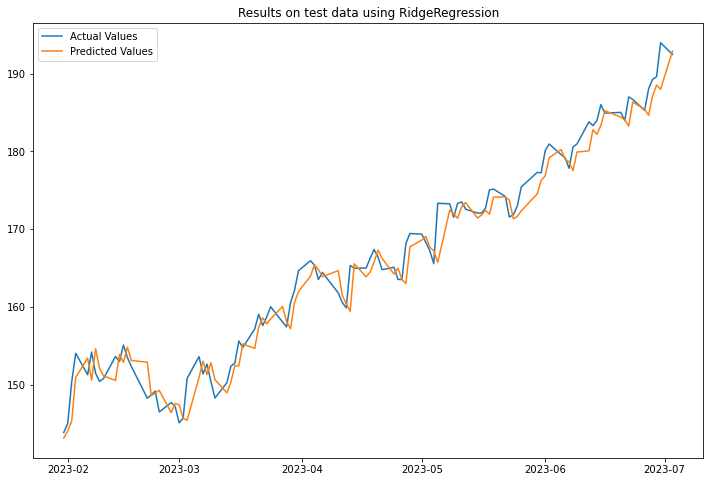

In [77]:
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0]
}
ridge = Ridge()
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)
model = grid_search.best_estimator_
model.fit(x_train,y_train)
analyze('RidgeRegression',model)

### 5. Lasso regressor

Mean Squared Error for train data: 8.436306921341826
R-squared Score for train data: 0.9539481091701372


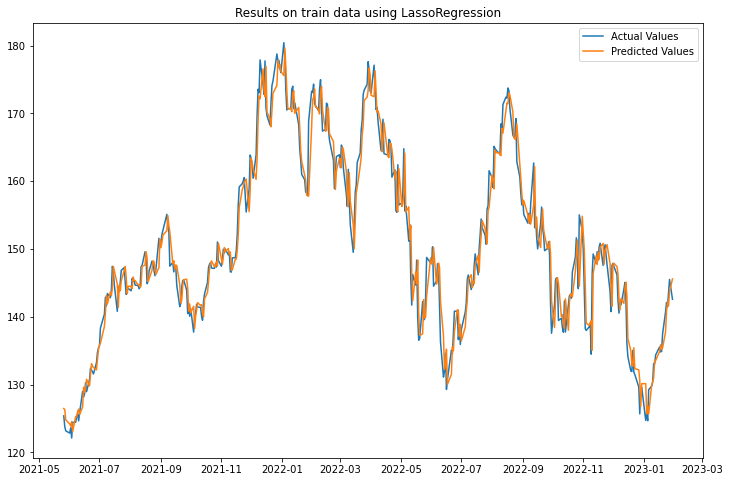

Mean Squared Error for test data: 5.227316679452518
R-squared Score for test data: 0.9689887714547023


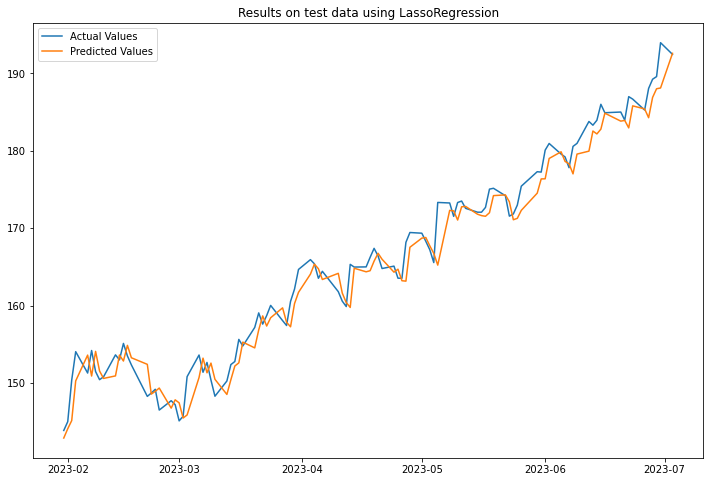

In [78]:
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0]
}
ridge = Lasso()
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)
model = grid_search.best_estimator_
model.fit(x_train,y_train)
analyze('LassoRegression',model)

Mean Squared Error for train data: 8.428698907678754
R-squared Score for train data: 0.9539896395954656


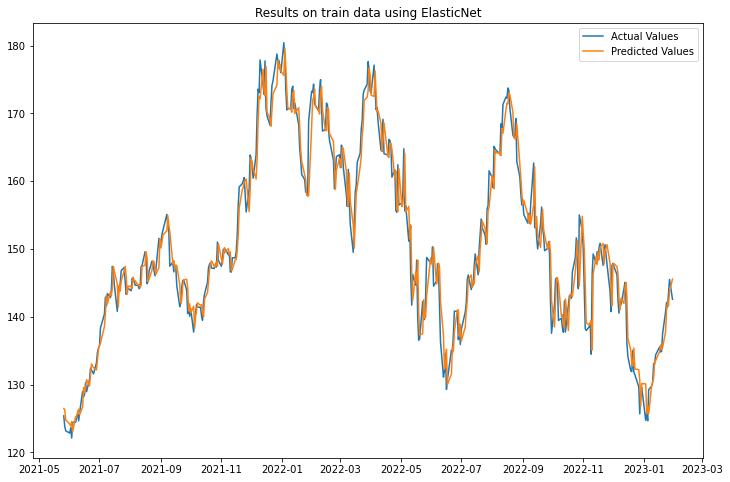

Mean Squared Error for test data: 5.211297879048667
R-squared Score for test data: 0.9690838035162374


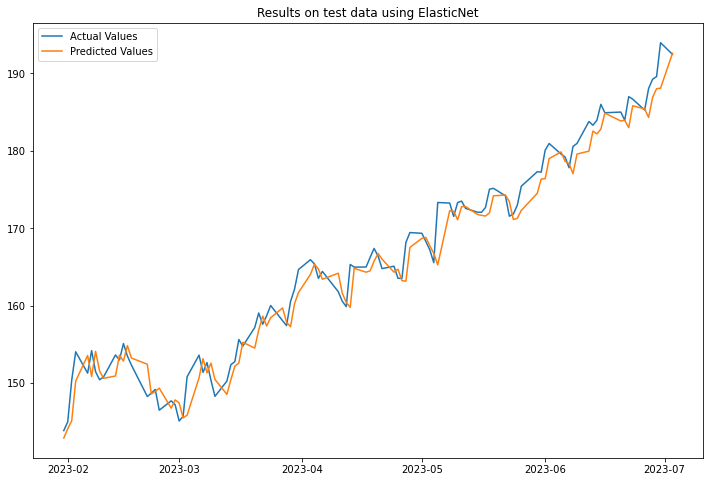

In [79]:
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

enet = ElasticNet()

grid_search = GridSearchCV(estimator=enet, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

model = grid_search.best_estimator_
model.fit(x_train,y_train)
analyze('ElasticNet',model)

Mean Squared Error for train data: 11.745272330848726
R-squared Score for train data: 0.9358852156292551


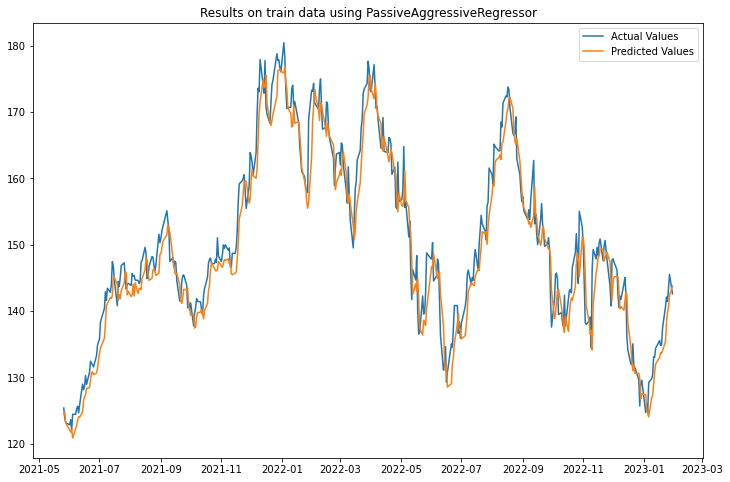

Mean Squared Error for test data: 9.421036036712557
R-squared Score for test data: 0.9441093931009785


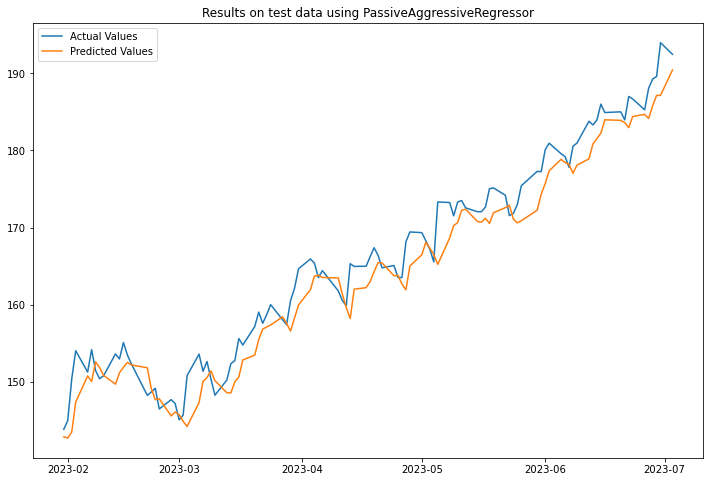

In [80]:
model = PassiveAggressiveRegressor()
model.fit(x_train,y_train)
analyze('PassiveAggressiveRegressor',model)

### Conclusion:
- `Linear regressor` is better than all when it comes to test accuracy. `Ridge` and `Lasso regression` and `ElasticNet` were also quite good and had similar r2 score.
- `RandomForestRegressor` and `XGboostRegressor` were overfitting to the training data. We tried changing hyperparams but it didn't help much. 
- `PassiveAggressiveRegressor` had satisfactory results but they weren't as good as linear regressor. 

Hence we can conclude that `linear regressor` is best as of now.
